In [1]:
!pip install pandas

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

# Example of merging multiple CSV files into a single DataFrame
file_paths = [r"D:\\industrial\\Data1.csv", r"D:\\industrial\\Data2.csv", r"D:\\industrial\\Data3.csv",
              r"D:\\industrial\\Data4.csv", r"D:\\industrial\\Data5.csv", r"D:\\industrial\\Data6.csv",
               r"D:\\industrial\\Data7.csv", r"D:\\industrial\\Data8.csv", r"D:\\industrial\\Data9.csv",
              r"D:\\industrial\\Data10.csv", r"D:\\industrial\\Data11.csv", r"D:\\industrial\\Data12.csv",
              r"D:\\industrial\\Data13.csv", r"D:\\industrial\\Data14.csv", r"D:\\industrial\\Data15.csv",
              r"D:\\industrial\\Data16.csv", r"D:\\industrial\\Data17.csv", r"D:\\industrial\\Data18.csv",
               r"D:\\industrial\\Data19.csv", r"D:\\industrial\\Data20.csv", r"D:\\industrial\\Data21.csv",
              r"D:\\industrial\\Data22.csv", r"D:\\industrial\\Data23.csv"]
dataframes = [pd.read_csv(file, encoding='latin1') for file in file_paths]
merged_df = pd.concat(dataframes, ignore_index=True)


In [2]:
merged_df.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0000,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136
3,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,`12,`000,STATE - ARUNACHAL PRADESH,`01,`011,`0112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120


DATA CLEANING

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [4]:
merged_df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [5]:
merged_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool

In [6]:

merged_df.drop_duplicates(inplace=True)
#merged_df.fillna(method='ffill', inplace=True)  # Forward fill for missing values

In [7]:
# remove unnec comma, semi colon,
merged_df['State Code'] = merged_df['State Code'].astype(str).str.replace('`', '')
merged_df['District Code'] = merged_df['District Code'].astype(str).str.replace('`', '')
merged_df['Division'] = merged_df['Division'].astype(str).str.replace('`', '').astype('int64')
merged_df['Group'] = merged_df['Group'].astype(str).str.replace('`', '').astype('int64')
merged_df['Class'] = merged_df['Class'].astype(str).str.replace('`', '').astype('int64')

In [8]:
# Get descriptive statistics
print(merged_df.describe(include='all'))

       State Code District Code         India/States       Division  \
count      195145        195145               195145  195145.000000   
unique         23           472                  491            NaN   
top            08           000  STATE - WEST BENGAL            NaN   
freq        21662         14715                  749            NaN   
mean          NaN           NaN                  NaN      46.590351   
std           NaN           NaN                  NaN      28.800311   
min           NaN           NaN                  NaN       0.000000   
25%           NaN           NaN                  NaN      23.000000   
50%           NaN           NaN                  NaN      46.000000   
75%           NaN           NaN                  NaN      70.000000   
max           NaN           NaN                  NaN      99.000000   

                Group          Class                   NIC Name  \
count   195145.000000  195145.000000                     195145   
unique       

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  int64 
 4   Group                                195145 non-null  int64 
 5   Class                                195145 non-null  int64 
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [10]:
merged_df.columns = merged_df.columns.str.replace('-', '').str.replace(' ', '_').str.replace('__', '_')

In [11]:
merged_df.columns

Index(['State_Code', 'District_Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC_Name', 'Main_Workers_Total__Persons',
       'Main_Workers_Total_Males', 'Main_Workers_Total_Females',
       'Main_Workers_Rural__Persons', 'Main_Workers_Rural_Males',
       'Main_Workers_Rural_Females', 'Main_Workers_Urban__Persons',
       'Main_Workers_Urban_Males', 'Main_Workers_Urban_Females',
       'Marginal_Workers_Total__Persons', 'Marginal_Workers_Total_Males',
       'Marginal_Workers_Total_Females', 'Marginal_Workers_Rural__Persons',
       'Marginal_Workers_Rural_Males', 'Marginal_Workers_Rural_Females',
       'Marginal_Workers_Urban__Persons', 'Marginal_Workers_Urban_Males',
       'Marginal_Workers_Urban_Females'],
      dtype='object')

In [12]:
merged_df.head()

,State_Code,District_Code,India/States,Division,Group,Class,NIC_Name,Main_Workers_Total__Persons,Main_Workers_Total_Males,Main_Workers_Total_Females,...,Main_Workers_Urban_Females,Marginal_Workers_Total__Persons,Marginal_Workers_Total_Males,Marginal_Workers_Total_Females,Marginal_Workers_Rural__Persons,Marginal_Workers_Rural_Males,Marginal_Workers_Rural_Females,Marginal_Workers_Urban__Persons,Marginal_Workers_Urban_Males,Marginal_Workers_Urban_Females
0,12,000,STATE - ARUNACHAL PRADESH,0,0,0,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,12,000,STATE - ARUNACHAL PRADESH,1,0,0,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,12,000,STATE - ARUNACHAL PRADESH,1,11,0,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136
3,12,000,STATE - ARUNACHAL PRADESH,1,11,111,"Growing of cereals (except rice), leguminous c...",171,98,73,...,23,33,16,17,30,14,16,3,2,1
4,12,000,STATE - ARUNACHAL PRADESH,1,11,112,Growing of rice,1944,1106,838,...,287,1005,480,525,780,375,405,225,105,120


In [13]:
# Summary statistics for numerical columns
print(merged_df.describe())



            Division          Group          Class  \
count  195145.000000  195145.000000  195145.000000   
mean       46.590351     389.422404    2293.804709   
std        28.800311     313.186034    3059.131669   
min         0.000000       0.000000       0.000000   
25%        23.000000     103.000000       0.000000   
50%        46.000000     370.000000     113.000000   
75%        70.000000     631.000000    4659.000000   
max        99.000000     992.000000    9920.000000   

       Main_Workers_Total__Persons  Main_Workers_Total_Males  \
count                 1.951450e+05              1.951450e+05   
mean                  1.492138e+03              1.193171e+03   
std                   4.568169e+04              3.773917e+04   
min                   0.000000e+00              0.000000e+00   
25%                   6.000000e+00              6.000000e+00   
50%                   2.800000e+01              2.300000e+01   
75%                   1.880000e+02              1.450000e+02   
m

In [14]:
# Summary statistics for categorical columns
print(merged_df.describe(include=['object']))

       State_Code District_Code         India/States  \
count      195145        195145               195145   
unique         23           472                  491   
top            08           000  STATE - WEST BENGAL   
freq        21662         14715                  749   

                         NIC_Name  
count                      195145  
unique                        587  
top     Construction of buildings  
freq                         1446  


Data Visualization

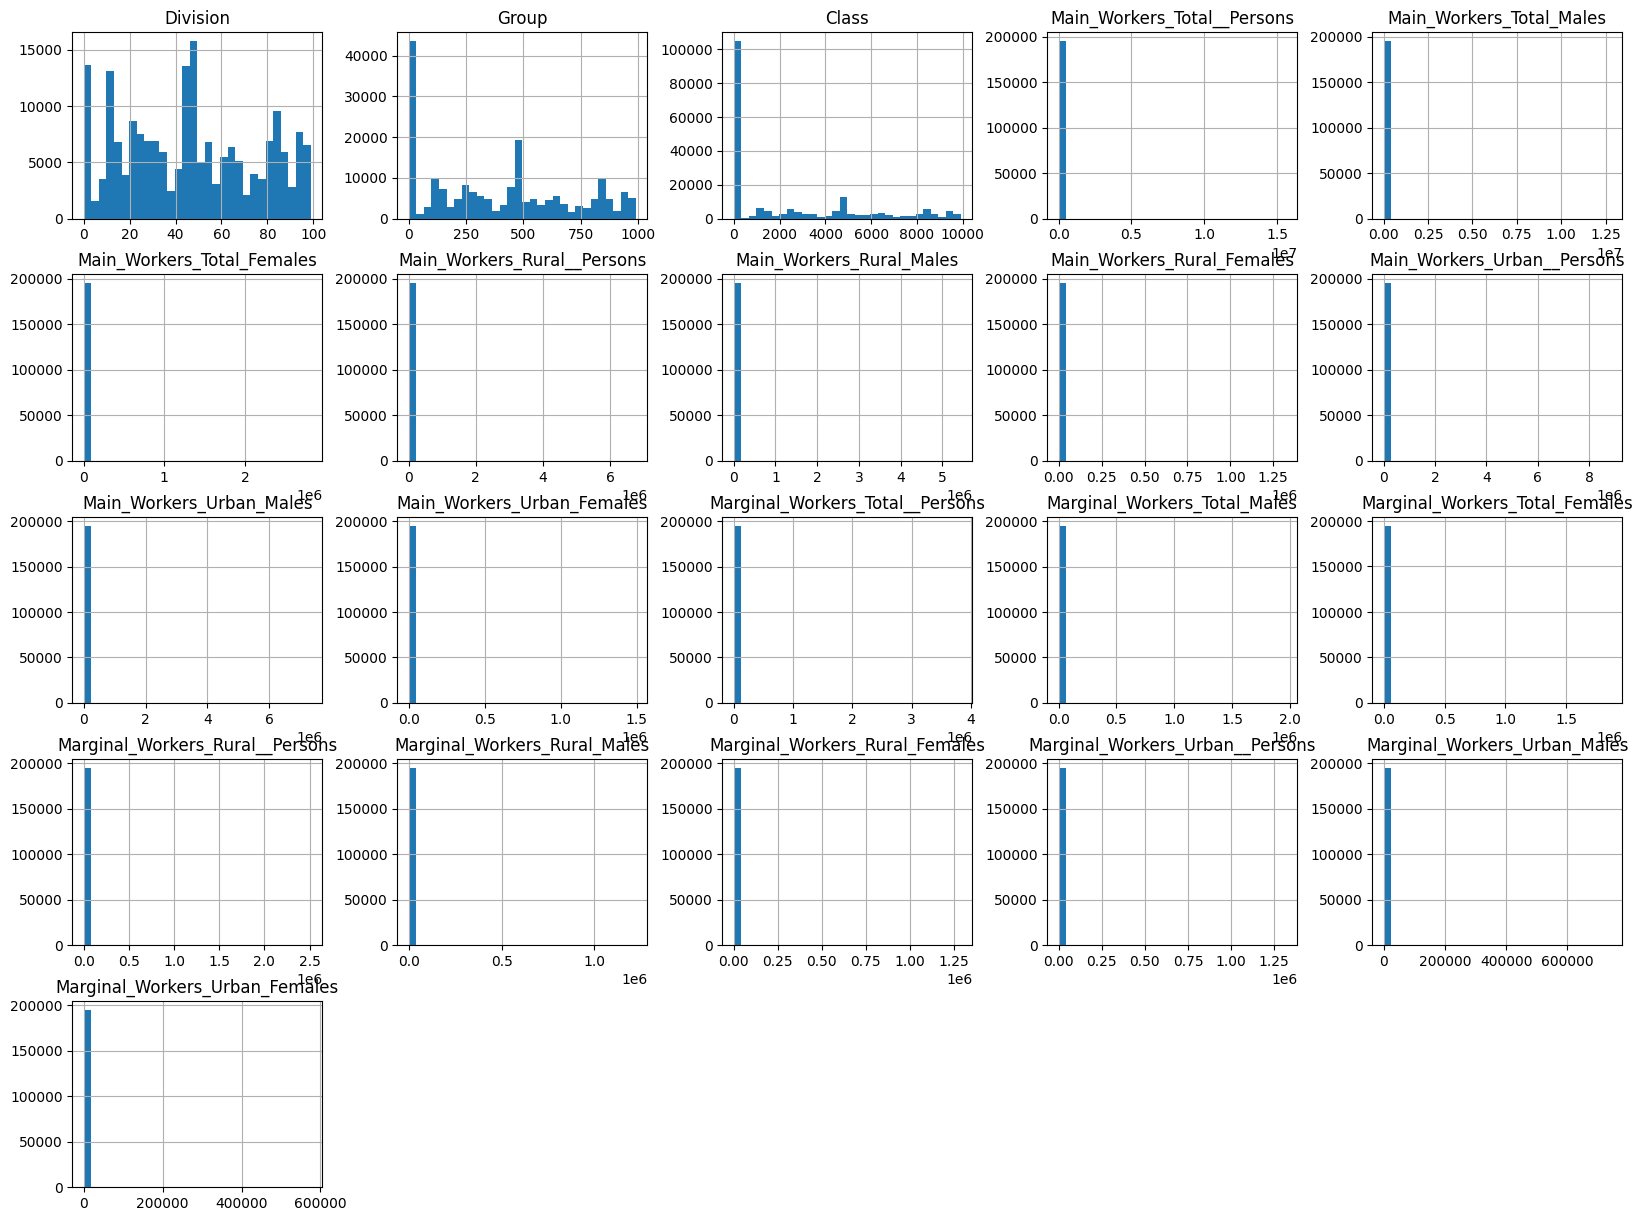

In [15]:
#Distribution of Numerical Features:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
merged_df.select_dtypes(include=['number']).hist(bins=30, figsize=(20, 15))
plt.show()

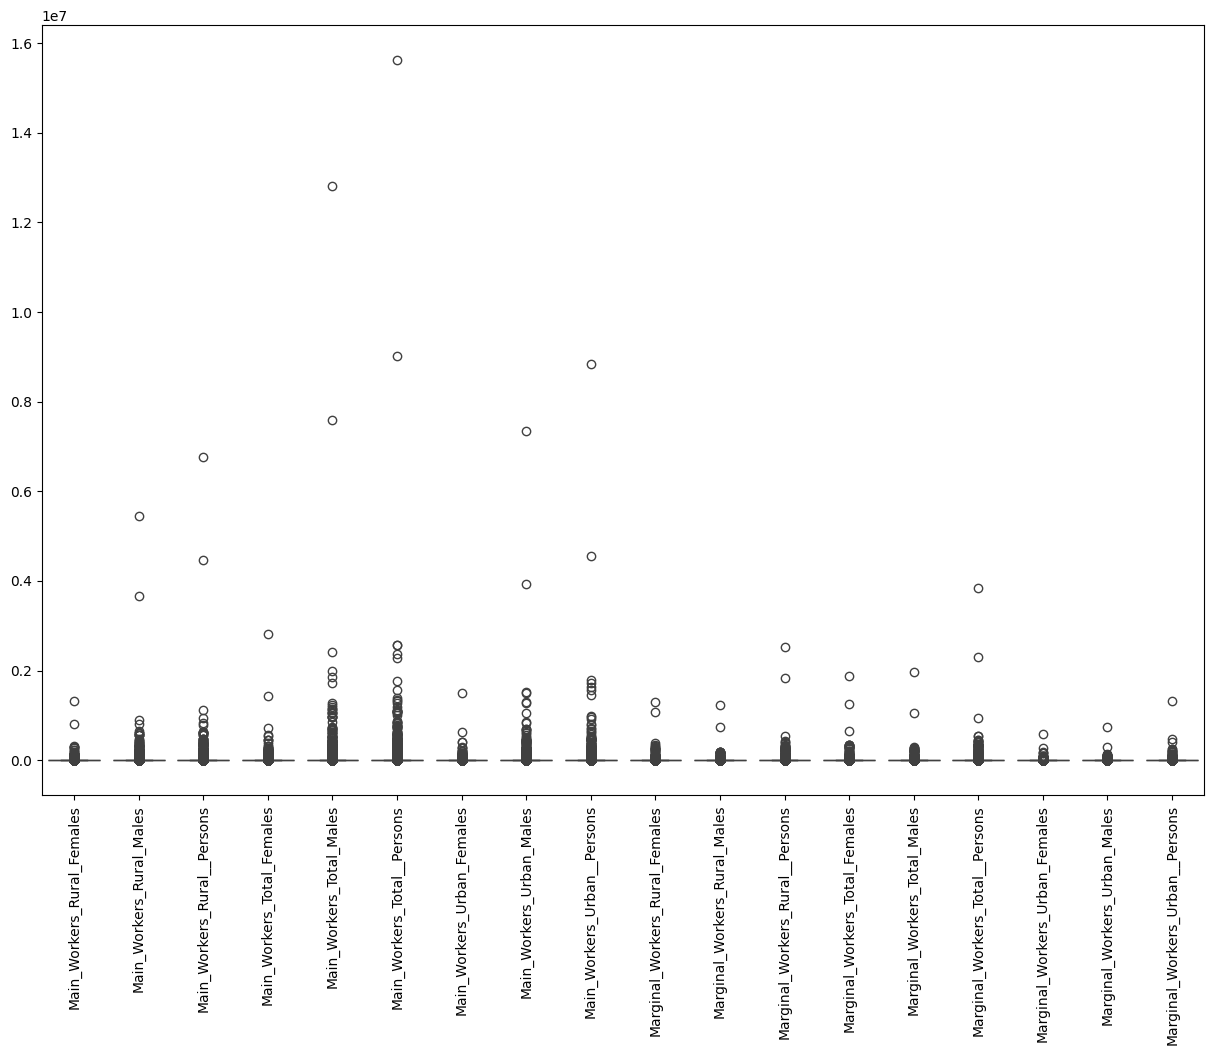

In [16]:
# Identifying numerical columns
numerical_cols = merged_df.select_dtypes(include=['number']).columns.difference(['Division', 'Group', 'Class']).tolist()

# Visualizing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=merged_df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

In [17]:
# Detecting outliers using IQR
Q1 = merged_df[numerical_cols].quantile(0.25)
Q3 = merged_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (merged_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (merged_df[numerical_cols] > (Q3 + 1.5 * IQR))

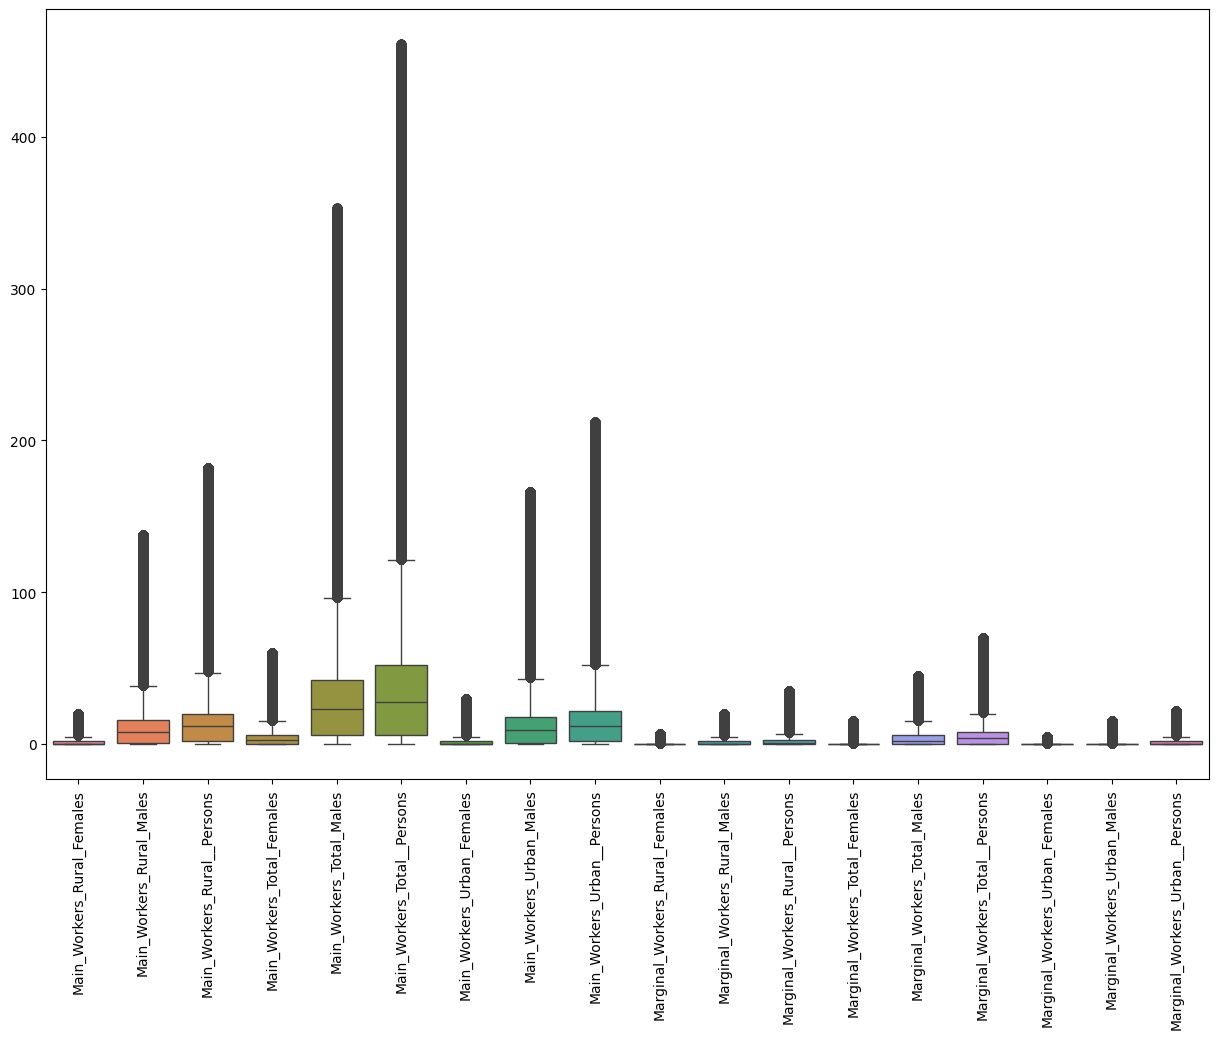

In [18]:
import numpy as np
# Alternatively, handling outliers: Imputation
for col in numerical_cols:
    median = merged_df[col].median()
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    merged_df[col] = np.where(merged_df[col] > upper_bound, median, merged_df[col])
    merged_df[col] = np.where(merged_df[col] < lower_bound, median, merged_df[col])

# Verifying no outliers left
plt.figure(figsize=(15, 10))
sns.boxplot(data=merged_df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

In [19]:
# Select only the numeric columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns
numeric_data = merged_df[numeric_cols]
# Compute the correlation matrix
corr_matrix = numeric_data.corr()

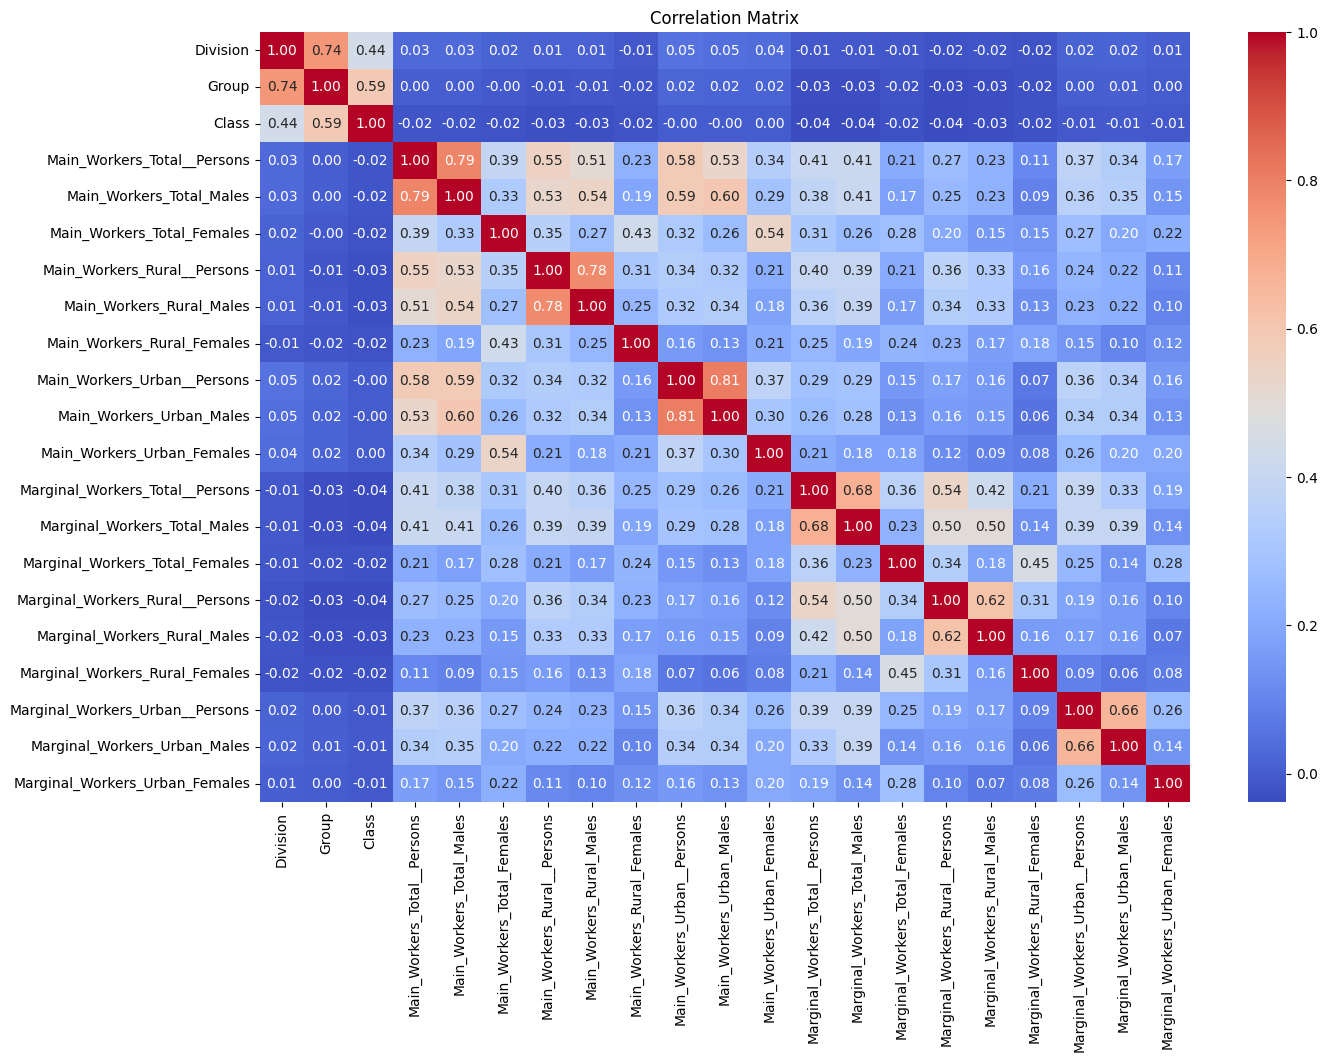

In [20]:
# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [1]:
#Pair Plots for Relationships:
sns.pairplot(corr_matrix.select_dtypes(include=['number']))
plt.show()  ################

NameError: name 'sns' is not defined

 Categorical Data Analysis

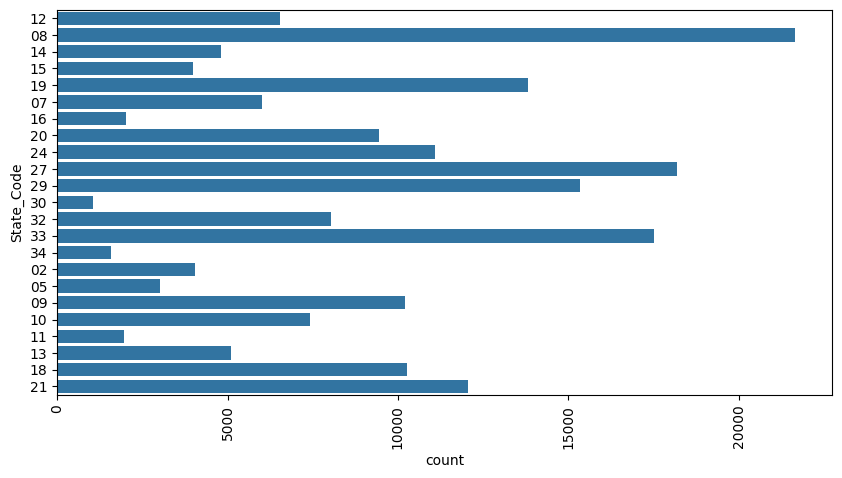

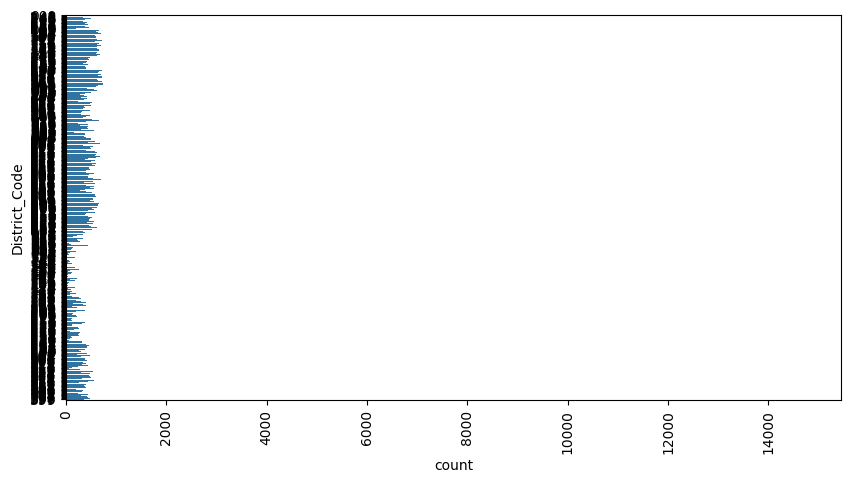

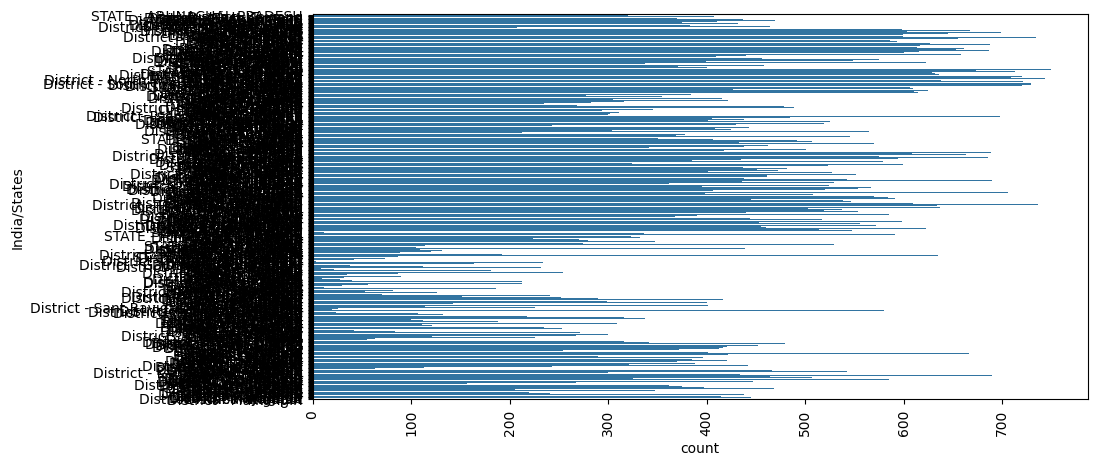

c:\Users\andro\Desktop\vs data science\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


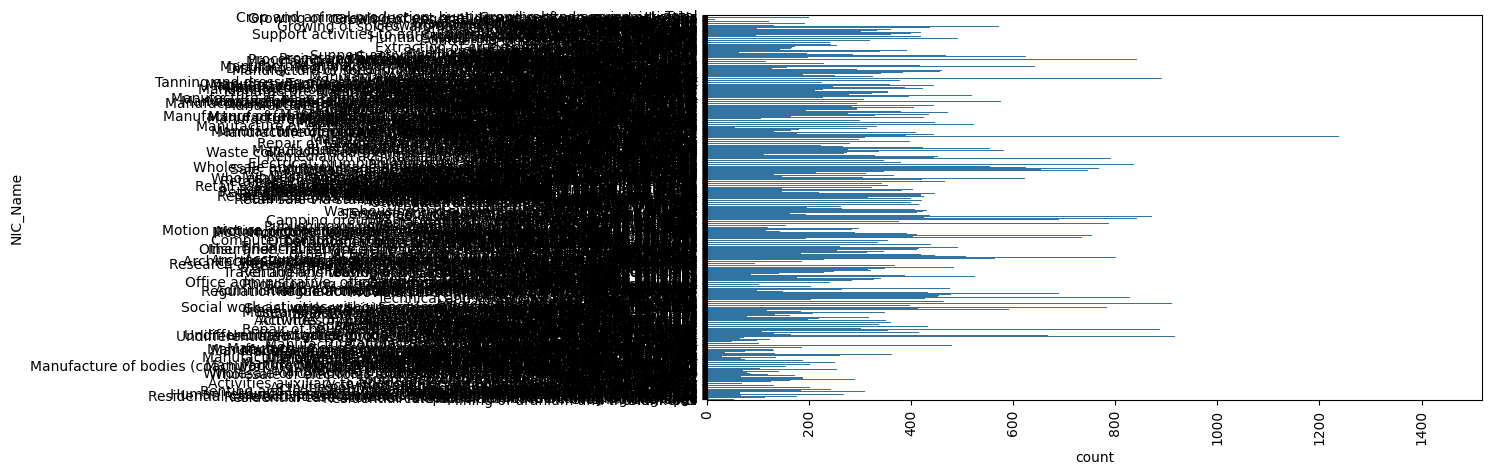

KeyboardInterrupt: 

In [21]:
# Bar plot for categorical columns
#categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()
#categorical_cols.extend(['Division', 'Group', 'Class'])
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist() + ['Division', 'Group', 'Class']

for column in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(merged_df[column])
    plt.xticks(rotation=90)
    plt.show()

Group Analysis

                                                District_Code  \
State_Code                                                      
02          0000000000000000000000000000000000000000000000...   
05          0000000000000000000000000000000000000000000000...   
07          0000000000000000000000000000000000000000000000...   
08          0000000000000000000000000000000000000000000000...   
09          0000000000000000000000000000000000000000000000...   

                                                 India/States  Division  \
State_Code                                                                
02          STATE - HIMACHAL PRADESHSTATE - HIMACHAL PRADE...    193069   
05          STATE - UTTARAKHANDSTATE - UTTARAKHANDSTATE - ...    146210   
07          STATE - NCT OF DELHISTATE - NCT OF DELHISTATE ...    287898   
08          STATE - RAJASTHANSTATE - RAJASTHANSTATE - RAJA...    991360   
09          STATE - UTTAR PRADESHSTATE - UTTAR PRADESHSTAT...    491186   

              Grou

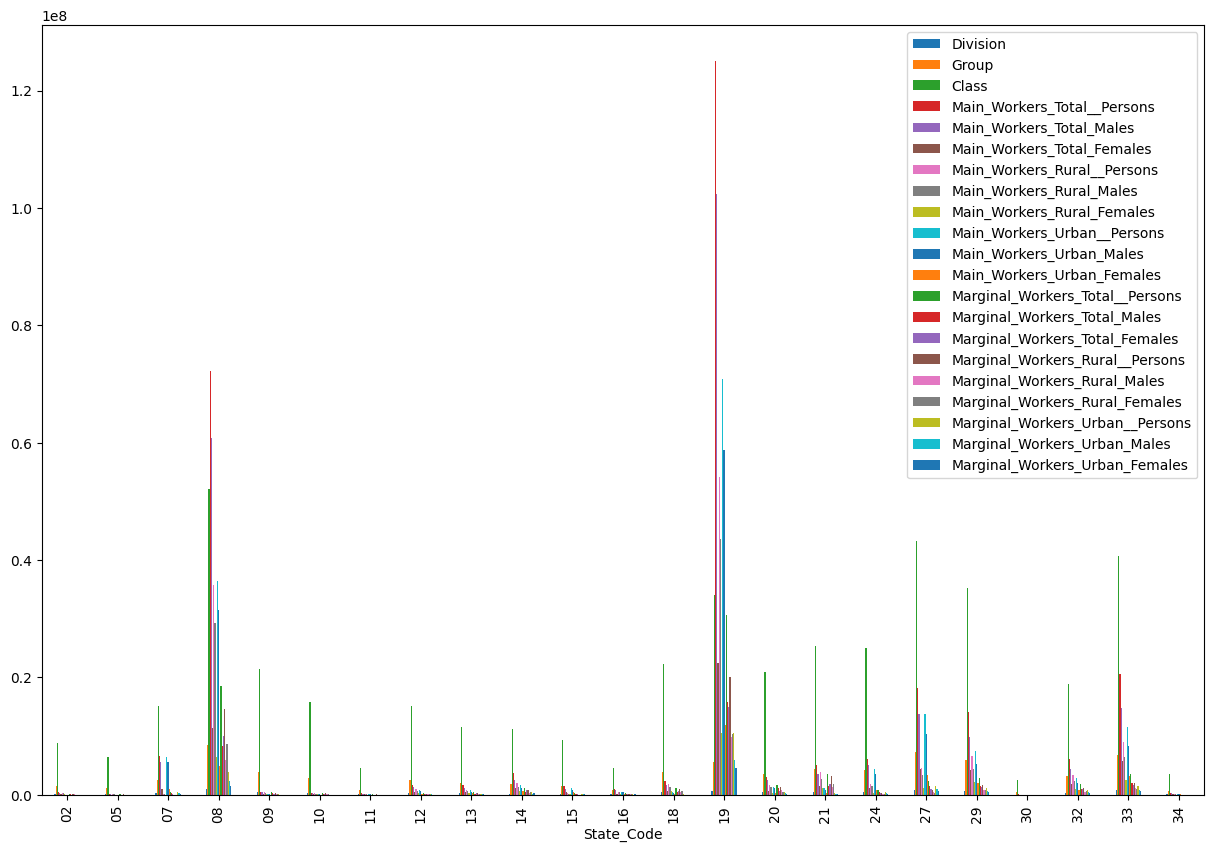

In [21]:
# Group by State Code and summarize
state_group = merged_df.groupby('State_Code').sum()
print(state_group.head())

# Plotting group analysis
state_group.plot(kind='bar', figsize=(15, 10))
plt.show()

Feature Engineering

In [22]:
# Example: Ratio of male to female workers
merged_df['Main_Workers_Male_Female_Ratio'] = merged_df['Main Workers - Total - Males'] / merged_df['Main Workers - Total - Females']

KeyError: 'Main Workers - Total - Males'

Hypothesis Testing

In [ ]:
from scipy.stats import ttest_ind

# Example: T-test between main workers in rural and urban areas
rural_workers = data['Main Workers - Rural -  Persons']
urban_workers = data['Main Workers - Urban -  Persons']

t_stat, p_val = ttest_ind(rural_workers.dropna(), urban_workers.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_val}")

Detailed Steps in Visualizations and Analysis

Numerical Data Visualization:

In [ ]:
# Distribution of main workers by gender
plt.figure(figsize=(12, 6))
sns.histplot(data['Main Workers - Total - Males'], kde=True, label='Males')
sns.histplot(data['Main Workers - Total - Females'], kde=True, color='orange', label='Females')
plt.legend()
plt.title('Distribution of Main Workers by Gender')
plt.show()

# Boxplot of main workers by rural and urban areas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Main Workers - Rural -  Persons', 'Main Workers - Urban -  Persons']])
plt.title('Boxplot of Main Workers in Rural and Urban Areas')
plt.show()

Categorical Data Visualization:

In [ ]:
# Distribution of NIC Name categories
plt.figure(figsize=(14, 7))
sns.countplot(y=data['NIC Name'], order=data['NIC Name'].value_counts().index)
plt.title('Distribution of NIC Name Categories')
plt.show()